<center>

# PhoenixEye Machine Learning

<img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEg1vYnO373J4Edv4m_L2jmn0FxxYGzXBPSVsFcXARl7gIhuqCZd4PYlIjKra2vk7CGAWoreCKALi1IHn8CBL-Kn1I7mSjJ-2AvYnFhl8PdrOF0MyJeUcTjWjj1rldHjtahHRkW9rTSi8Ujw5uX-qWjcGwTf9I31tSJuflW662xA2FvtJERCvNJ-ksFtwjM/s1024/logo_oficial.png" width="500" height="500">

The notebook is designed to predict the path of fires in a specific area of ​​Nogales, Sonora, covering a sampling area of ​​64 km x 64 km. The data, which ranges from 2016 to 2023, comes from the FIRMS system (Fire Information for Resource Management System). Popular Python libraries such as matplotlib, seaborn, pandas, and numpy are used for data analysis and visualization. Additionally, the machine learning model implements convolutional neural networks (CNN) and long short-term memory networks (LSTM). The notebook starts by importing these libraries and loading the data set from a CSV file. The data is then binned into 6-hour time intervals to facilitate subsequent analysis.

</center>



# **Area to be analyzed**

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/PhoenixEye

/content/drive/MyDrive/Colab Notebooks/PhoenixEye


In [ ]:
!pip install folium
!pip install mplleaflet


In [ ]:
import folium
from folium import DivIcon

nogales_range = {
    'lat_min': 30.73819440764155,
    'lat_max': 31.31219440764155,
    'lon_min': -111.2942054407774,
    'lon_max': -110.6342054407774
}

# Calculate the midpoint to center the map
lat_center = (nogales_range['lat_min'] + nogales_range['lat_max']) / 2
lon_center = (nogales_range['lon_min'] + nogales_range['lon_max']) / 2

# Create the map object
m = folium.Map(location=[lat_center, lon_center], zoom_start=10)

# Draw a rectangle to represent the range
folium.Rectangle(
    bounds=[[nogales_range['lat_min'], nogales_range['lon_min']], [nogales_range['lat_max'], nogales_range['lon_max']]],
    color='#ff7800',
    fill=True,
    fill_color='#ffff00',
    fill_opacity=0.2
).add_to(m)

# Add text near the corners to act as axis labels, now in bold
folium.Marker(
    [nogales_range['lat_min'], lon_center],
    icon=DivIcon(
        icon_size=(150, 36),
        icon_anchor=(0, -10),
        html='<div style="font-size: 12pt"><b>64 km</b></div>',
        )
    ).add_to(m)

folium.Marker(
    [lat_center, nogales_range['lon_min']],
    icon=DivIcon(
        icon_size=(150, 36),
        icon_anchor=(60, 0),
        html='<div style="font-size: 12pt"><b>64 km</b></div>',
        )
    ).add_to(m)

# Show the map
m



# **Data Analysis and Visualization of Time-based Records from 2016 to 2023**



Import libraries

In [ ]:
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter



Read the data

In [ ]:
df = pd.read_csv('Dataset_Nogales_Filtered.csv', parse_dates=['Datetime'])
print(df.head())


   Column 1  brightness  confidence daynight      hour        date  \
0         0       322.0          68        D  21:00:00  24/02/2016   
1         1       313.8          32        D  18:00:00  30/03/2016   
2         3       339.3          86        D  17:00:00  03/04/2016   
3         2       325.5          67        D  17:00:00  03/04/2016   
4         4       301.6          43        N  09:00:00  04/04/2016   

             Datetime  Fire  latitude  longitude  
0 2016-02-24 21:00:00     1   30.8342  -110.8534  
1 2016-03-30 18:00:00     1   31.2519  -110.9623  
2 2016-04-03 17:00:00     1   31.0988  -110.9110  
3 2016-04-03 17:00:00     1   31.0972  -110.8965  
4 2016-04-04 09:00:00     1   30.7656  -110.8255  


<ipython-input-38-e27e8700d5ef>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('Dataset_Nogales_Filtered.csv', parse_dates=['Datetime'])


Group the records by day

In [ ]:
# Group the records by day
vPd = df.groupby([pd.Grouper(key='Datetime', freq='6H')]).size().reset_index(name='count')

# Show the first few rows of the dataframe to understand its structure
vPd


,Datetime,count
0,2016-02-24 18:00:00,1
1,2016-02-25 00:00:00,0
2,2016-02-25 06:00:00,0
3,2016-02-25 12:00:00,0
4,2016-02-25 18:00:00,0
...,...,...
11049,2023-09-18 00:00:00,0
11050,2023-09-18 06:00:00,1
11051,2023-09-18 12:00:00,4
11052,2023-09-18 18:00:00,4


Group the record by month

In [ ]:
# Group the records by month
vPm = df.groupby([pd.Grouper(key='Datetime', freq='M')]).size().reset_index(name='count')

# Show the first few rows of the dataframe to understand its structure
vPm


,Datetime,count
0,2016-02-29,1
1,2016-03-31,1
2,2016-04-30,6
3,2016-05-31,1
4,2016-06-30,5
...,...,...
87,2023-05-31,5
88,2023-06-30,35
89,2023-07-31,6
90,2023-08-31,3


Get the names of the months



In [ ]:
# Get the names of the months from the 'Datetime' column in the vPm DataFrame
month_names = vPm["Datetime"].dt.month_name()
month_names


,Datetime
0,February
1,March
2,April
3,May
4,June
5,July
6,August
7,September
8,October
9,November


It generates a graph with the frequencies of the records by day from 2016 to 2023.


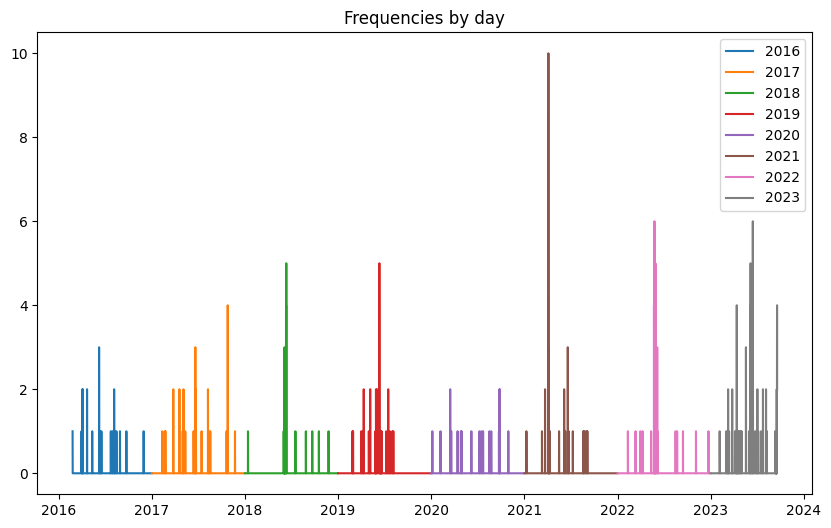

In [ ]:
# Define a function to format the y-axis labels
def format_y_tick(tick_val, tick_pos):
    return f'{int(tick_val):,}'

# Plot the data
fig = plt.figure(figsize=(10, 6))
for year in vPd['Datetime'].dt.year.unique():
    data = vPd[vPd['Datetime'].dt.year == year]
    plt.plot(data['Datetime'], data['count'], label=year)

plt.title('Frequencies by day')
plt.ticklabel_format(axis='y', style='plain')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))
plt.legend()
plt.show()


Frequencies of the records by month.

In [ ]:
# Define a function to assign a color to each year
def assign_color(row):
    year = row.Datetime.year
    if year == 2015:
        return 'blue'
    elif year == 2016:
        return 'orange'
    elif year == 2017:
        return 'green'
    elif year == 2018:
        return 'red'
    else:
        return 'purple'

# Apply the function to each row of the dataframe to generate a list of colors
colors = vPm.apply(assign_color, axis=1)

# Generate the bar chart
ax = vPm["count"].plot(kind='bar', figsize=(15, 5), color=colors)

# Change the x-axis labels
ax.set_xticklabels(vPm["Datetime"].dt.month_name())

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Set the y-axis tick formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))

# Show the plot
plt.show()


Frecuencies of the records by month.

In [ ]:
# Filter the data to include only the months from June to October
vPmPrincipal = vPm[(vPm["Datetime"].dt.month > 5) & (vPm["Datetime"].dt.month < 11)]

# Apply the function to each row of the dataframe to generate a list of colors
colors = vPmPrincipal.apply(assign_color, axis=1)

# Generate the bar chart
ax = vPmPrincipal["count"].plot(kind='bar', figsize=(15, 5), color=colors)

# Change the x-axis labels
ax.set_xticklabels(vPmPrincipal["Datetime"].dt.month_name())

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Set the y-axis tick formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))

# Show the plot
plt.show()


# **Multi-faceted Data Analysis and Visualization of Fire Incidents and Environmental Factors**

Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install numpy

In [ ]:
pip install scipy

It loads a different dataset, this one would be used to know more deeper how other variables can affect the wildfires.

In [ ]:

file_path = 'Dataset_Nogales.csv'
df = pd.read_csv(file_path)

df


It obtains the number of columns in the dataframe

In [ ]:

num_columns = df.shape[1]

num_columns


Read only the specified columns from the CSV file

In [ ]:
# Read only the specified columns from the CSV file
# frp, fire radiation power
desired_columns = ['brightness', 'scan', 'track', 'satellite', 'confidence','frp','daynight','hour',
                   'date','temperature', 'apparent_temperature', 'heat_index', 'precipitation', 'humidity',
                   'wind_speed', 'solar_radiation', 'cloudiness', 'wind_direction', 'Fire']

# Load only the desired columns from the new dataset
filtered_df = pd.read_csv('Dataset_Nogales.csv', usecols=desired_columns)  # Make sure to include the '.csv' extension

# Get the number of rows in the filtered DataFrame
num_rows_filtered = filtered_df.shape[0]

# Display the first rows of the filtered DataFrame and the number of rows
print(filtered_df.head())
print(f'The DataFrame has {num_rows_filtered} rows.')


It print the head of the dataset.

In [ ]:
df.head()

1. Fire-related factors: 'brightness' and 'frp' (fire radiative power) are strongly correlated. This suggests that these two factors could be good indicators for evaluating the intensity of a fire.

2. Atmospheric Conditions: Variables such as 'temperature', 'apparent_temperature' and 'heat_index' are moderately correlated with each other. This indicates that these variables tend to increase or decrease together, which makes sense since they are all related to the temperature of the environment.

3. Wind and Cloudiness: There is a negative correlation between 'wind_speed' and 'cloudiness'. Although the correlation is not strong, it could suggest that windier days tend to be less cloudy, or vice versa.

4. Fire Indicator: Surprisingly, the 'Fire' variable does not show a strong correlation with any of the other variables in the data set. This could mean that the presence of a fire is not easily predictable from these variables alone. It might be useful to explore more variables or factors that might be more closely related to fire occurrence.

5. Day and Night: The 'daynight' variable also does not show strong correlations, which could indicate that the time of day (day or night) does not have a significant impact on the other variables considered.

6. Lack of Strong Negative Correlations: There are no strong negative correlations in the matrix, suggesting that there are no variables acting as clear "antagonists" to each other in this data set.

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import math

# # Read the DataFrame from the CSV file
# df = pd.read_csv('Dataset_Nogales.csv')

# # Select the desired columns
selected_columns = ['brightness', 'scan', 'track', 'satellite', 'confidence','frp','daynight','hour',
                    'date','temperature', 'apparent_temperature', 'heat_index', 'precipitation', 'humidity',
                    'wind_speed', 'solar_radiation', 'cloudiness', 'wind_direction', 'Fire']

# # Filter the DataFrame to only include the selected columns
# correlation_df = df[selected_columns]

# # Convert the 'daynight' column to a numeric variable (D = 1, N = 0)
# correlation_df['daynight'] = correlation_df['daynight'].apply(lambda x: 1 if x == 'D' else 0)

# # Calculate the correlation matrix
# correlation_matrix = correlation_df.corr()

# # Create the visual correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
# plt.title('Correlation Matrix')
# plt.show()



**Observations:**


1.   Brightness: The matrix shows a variation of colors, indicating that there are a variety of values ​​for brightness. This could suggest different levels of intensity in the observed fires.

2.   Scan and Track: These matrices show less variation in colors, which could suggest that the 'Scan' and 'Track' variables do not vary significantly in the data set.

3. Confidence: There is notable variation in colors, indicating different levels of confidence in fire detection.

4. FRP (Fire Radiative Power): Similar to 'Brightness', there is a variation in colors, suggesting different levels of fire intensity.

5. Daynight: The matrix shows a significant presence of a single color, which could mean that the majority of the data falls into one category (Day or Night).

6. Temperature: There is considerable variation in colors, suggesting that temperature could vary significantly at different fires or times.



**Conclusions:**


*   Variables such as 'Brightness' and 'FRP' could be good indicators of fire
*   intensity, as they show a wide range of values.
'Scan' and 'Track' might not be very useful in differentiating between different fires, as their values ​​do not show much variation.
*   'Confidence' and 'Temperature' could also be important variables to consider, as they show significant variation in their values.






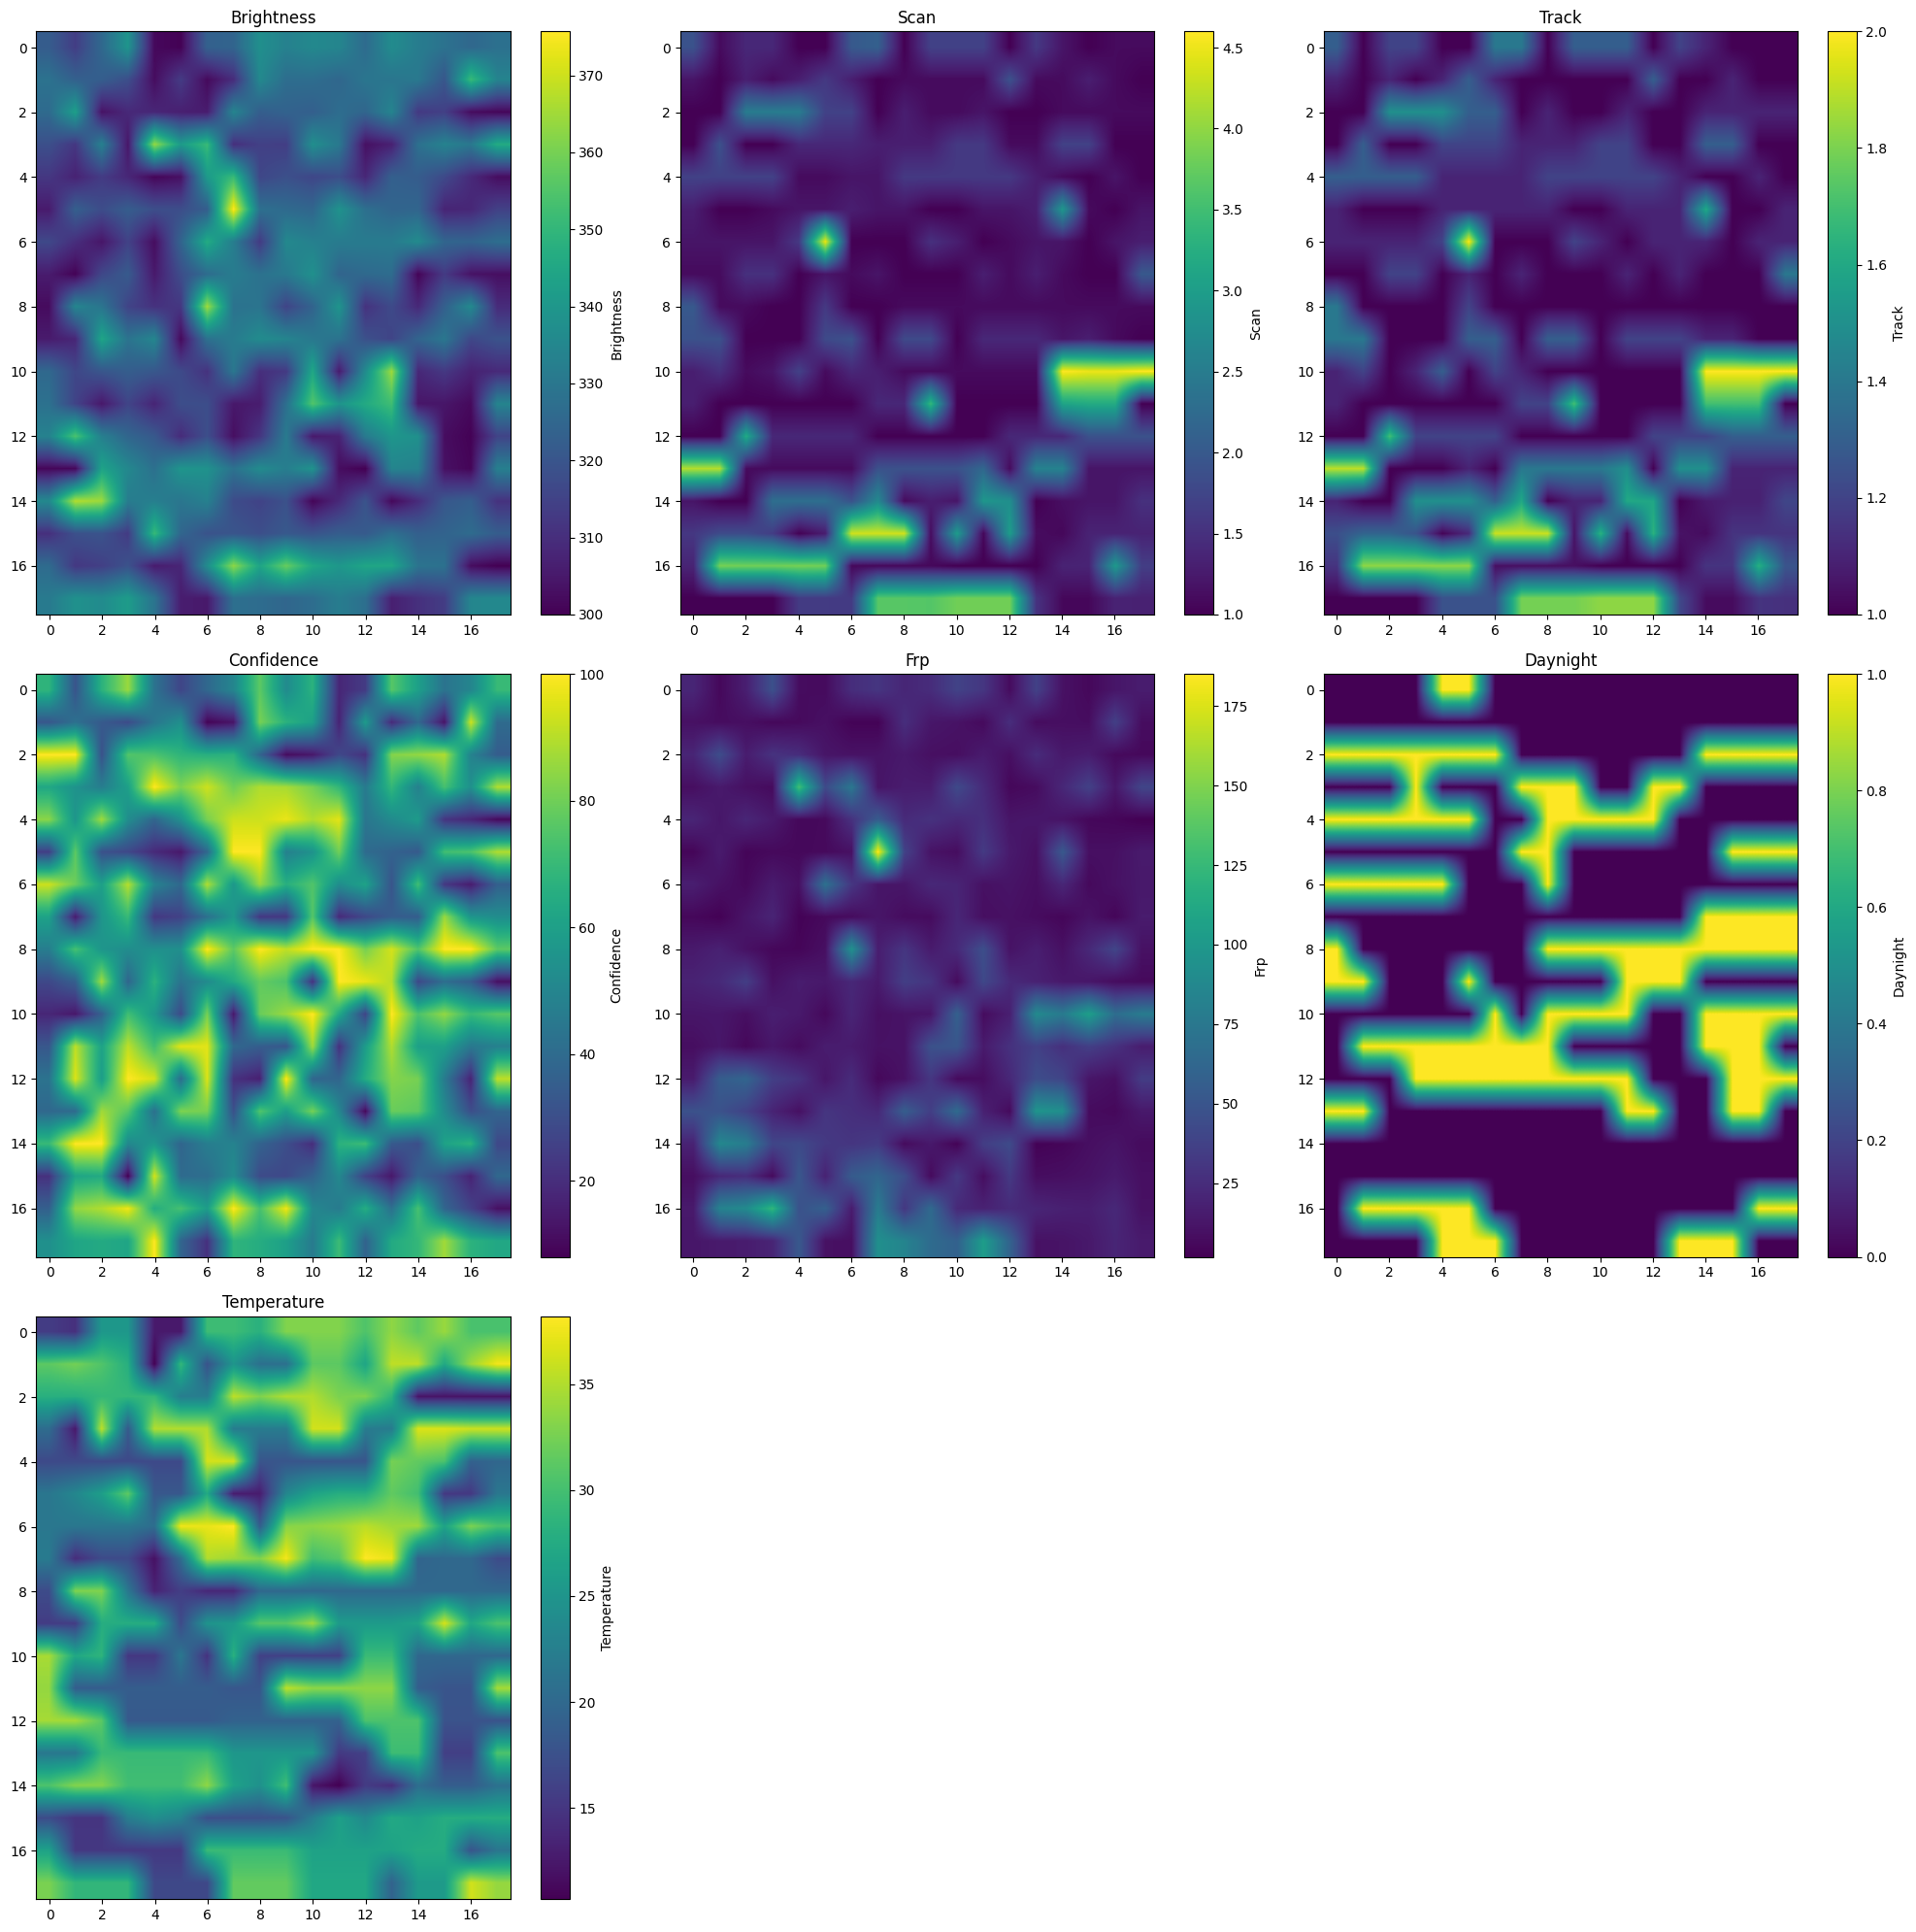

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder

# Define the columns to plot
columns_to_plot = ['brightness', 'scan', 'track', 'confidence', 'frp', 'daynight', 'temperature']

# Function to prepare data and create 18x18 matrix
def prepare_matrix(column_name, dim=18):
    column_data = df[column_name].dropna()
    if column_name in ['daynight']:  # Encoding the categorical column
        label_encoder = LabelEncoder()
        column_data = label_encoder.fit_transform(column_data)
    if isinstance(column_data, pd.Series):
        column_data = column_data.to_numpy()
    # Ensure that we have enough data to fill an 18x18 matrix, if not, pad with NaN
    required_elements = dim * dim
    if len(column_data) < required_elements:
        padding_count = required_elements - len(column_data)
        column_data = np.concatenate([column_data, np.full(padding_count, np.nan)])
    matrix = column_data[:required_elements].reshape(dim, dim)
    return matrix

# Read in the dataset
df = pd.read_csv('Dataset_Nogales.csv')

# Prepare 18x18 matrices and store them in the dictionary
matrices_dict = {}
for col in columns_to_plot:
    matrices_dict[col.capitalize()] = prepare_matrix(col)

# Plotting
plt.figure(figsize=(20, 20))
for i, (title, matrix) in enumerate(matrices_dict.items()):
    plt.subplot(3, 3, i + 1)  # Grid size is 3x3 to accommodate 7 plots
    plt.imshow(matrix, cmap='viridis', interpolation='bilinear', aspect='auto')
    plt.colorbar(label=title)
    plt.title(title)

plt.tight_layout()
plt.show()



**Observations:**

1. Apparent Temperature and Heat Index: Both matrices show a diversity of colors, suggesting variation in these climate-related factors.
2. Precipitation: The matrix displays predominantly a single color, which could indicate that precipitation is generally low or absent in the data collected.
3. Humidity: There is considerable variation in colors, suggesting that humidity varies in different situations.
4. Wind Speed: The variation in colors indicates a diversity in wind speed, which could be a relevant factor in the spread of fires.
5. Solar Radiation and Cloudiness: Both matrices show a diversity of colors, which suggests variations in climatic conditions.
6. Wind Direction: The matrix shows a variation of colors, suggesting that the wind direction varies significantly.

**Conclusions:**


*   Variables such as 'Apparent Temperature', 'Heat Index' and 'Humidity' could offer valuable information about atmospheric conditions during a fire.
*   'Wind Speed' and 'Wind Direction' could also be critical variables in understanding how a fire spreads.
*   'Precipitation' might not be a significant factor in this data set, possibly because fires are more likely under conditions of little or no rainfall.









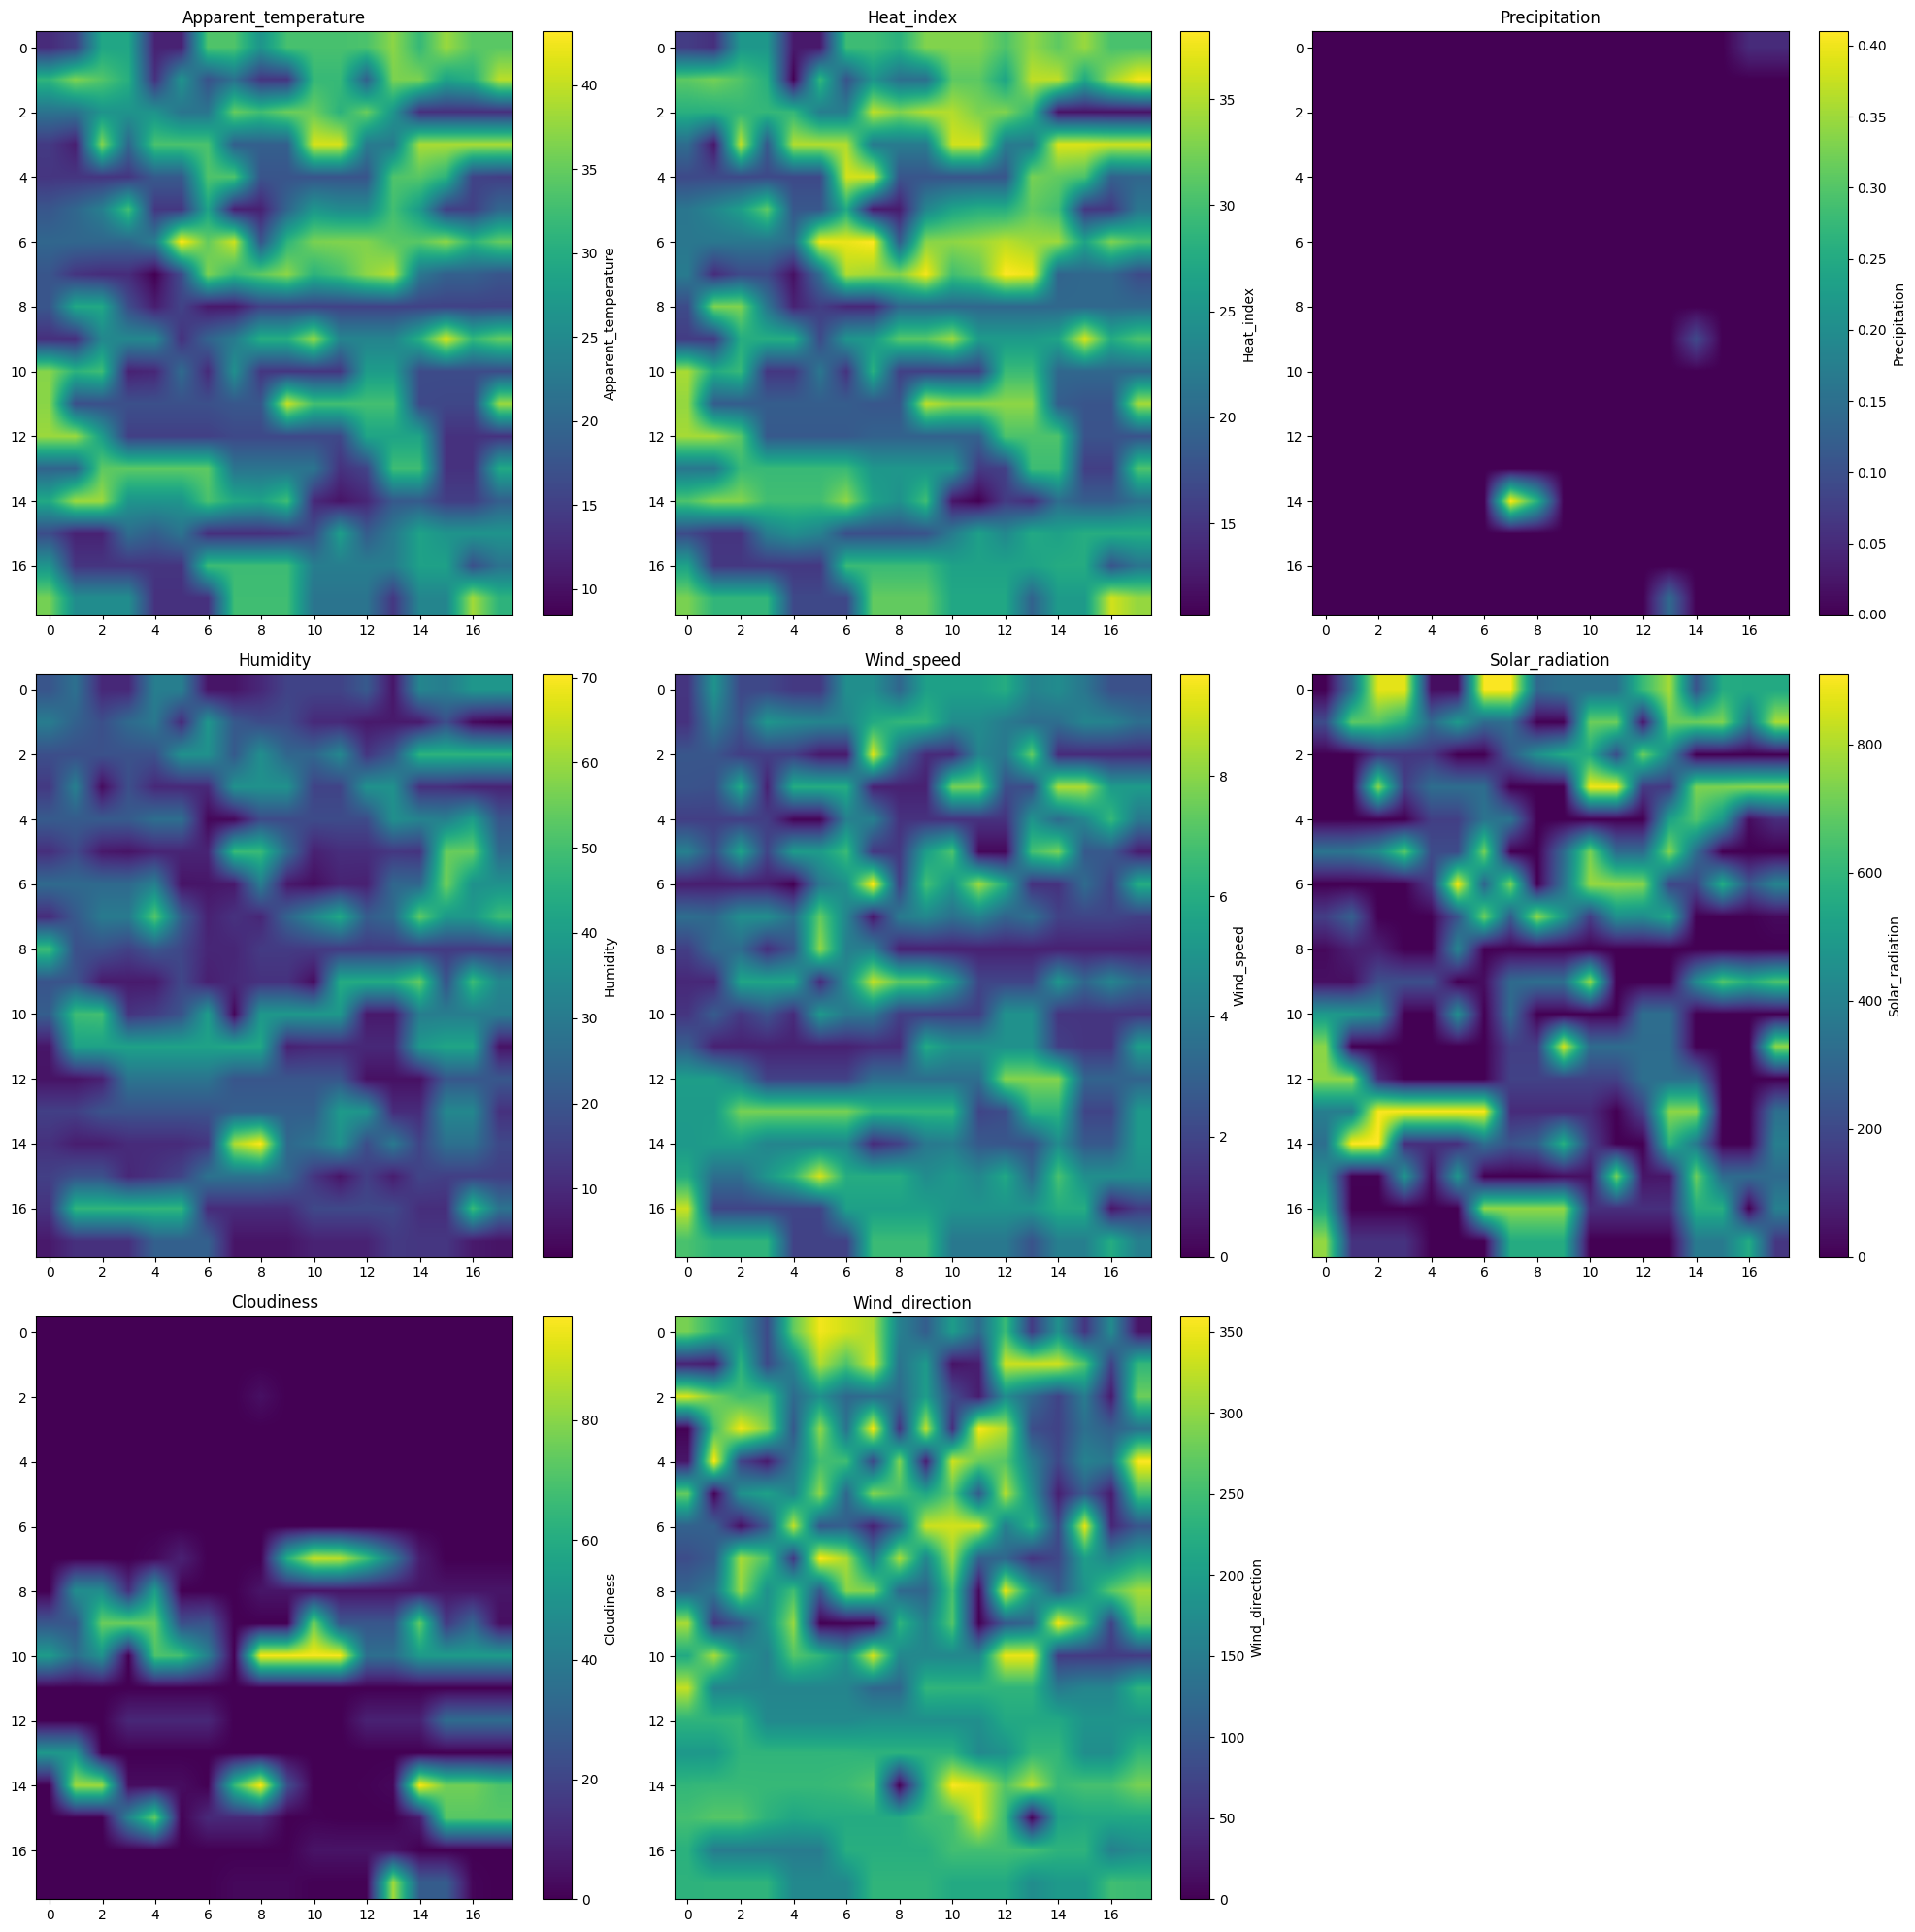

In [ ]:
# Define the columns to plot for the second grid
columns_to_plot_second_grid = ['apparent_temperature', 'heat_index', 'precipitation',
                               'humidity', 'wind_speed', 'solar_radiation', 'cloudiness', 'wind_direction']

# Prepare 18x18 matrices for the second grid and store them in a new dictionary
matrices_dict_second_grid = {}
for col in columns_to_plot_second_grid:
    matrices_dict_second_grid[col.capitalize()] = prepare_matrix(col)

# Plotting the second grid
plt.figure(figsize=(20, 20))
for i, (title, matrix) in enumerate(matrices_dict_second_grid.items()):
    plt.subplot(3, 3, i + 1)  # Grid size is 3x3 to accommodate 8 plots
    plt.imshow(matrix, cmap='viridis', interpolation='bilinear', aspect='auto')
    plt.colorbar(label=title)
    plt.title(title)

plt.tight_layout()
plt.show()


The bar graph above shows the frequency of data points specifically for the Aqua and Terra satellites in the original dataset. This gives us a focused view on how many data points are attributed to each of these two satellites.

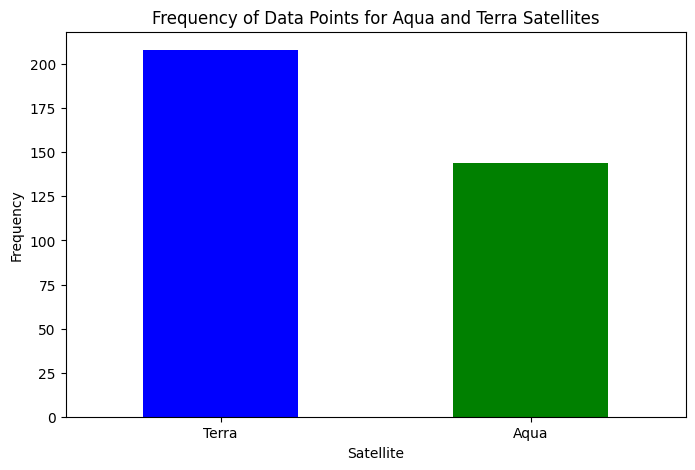

In [ ]:
# Filter the data to include only 'Aqua' and 'Terra' in the 'satellite' column
filtered_satellite_data = df[df['satellite'].isin(['Aqua', 'Terra'])]

# Check the frequency of 'Aqua' and 'Terra'
filtered_satellite_frequency = filtered_satellite_data['satellite'].value_counts()

# Plotting the frequency of 'Aqua' and 'Terra'
plt.figure(figsize=(8, 5))
filtered_satellite_frequency.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Satellite')
plt.ylabel('Frequency')
plt.title('Frequency of Data Points for Aqua and Terra Satellites')
plt.xticks(rotation=0)
plt.show()


The bar graph above shows the frequency of data points for each hour in the dataset. This allows us to see how many data points are collected at different hours of the day thorught 2016 and 2023. This show us that most of the time wildfires present at 18:00 and 20:00.

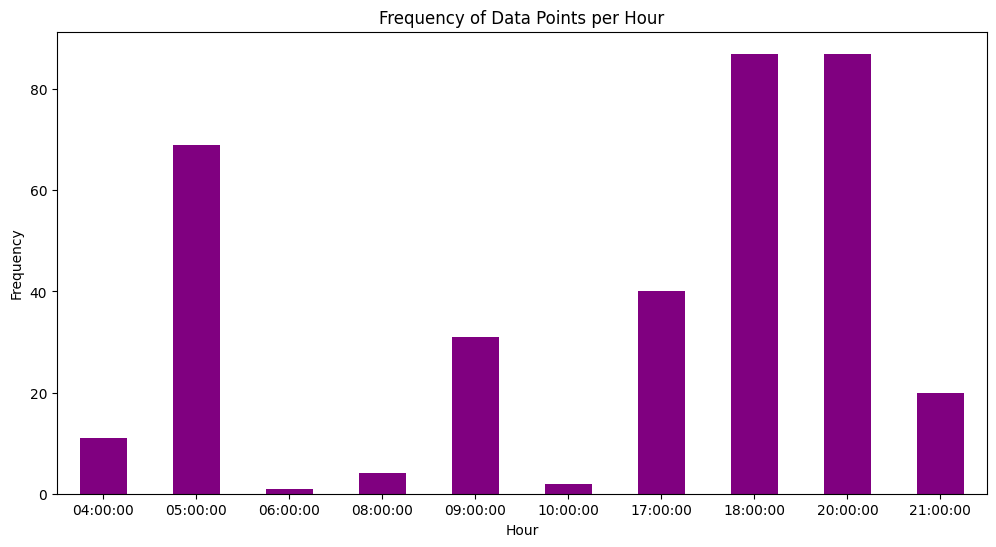

In [ ]:
# Since 'hout' exists in the new dataset, let's proceed to plot its frequency.
hora_frequency = df['hour'].value_counts().sort_index()

# Plotting the frequency of each unique value in the 'hora' column
plt.figure(figsize=(12, 6))
hora_frequency.plot(kind='bar', color='purple')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Frequency of Data Points per Hour')
plt.xticks(rotation=0)
plt.show()


The wind rose plot provides a visual summary of wind patterns, highlighting both the frequency and direction of wind occurrences. In this specific plot, the length or density of each "petal" points to how often the wind blows from a particular cardinal direction, such as North or South. By identifying the longest or densest petals, we can discern the dominant wind directions, offering valuable insights for applications like renewable energy sourcing, aviation, or agriculture. Short or sparse petals indicate directions from which the wind rarely comes, helping to identify any directional biases or gaps in wind activity.

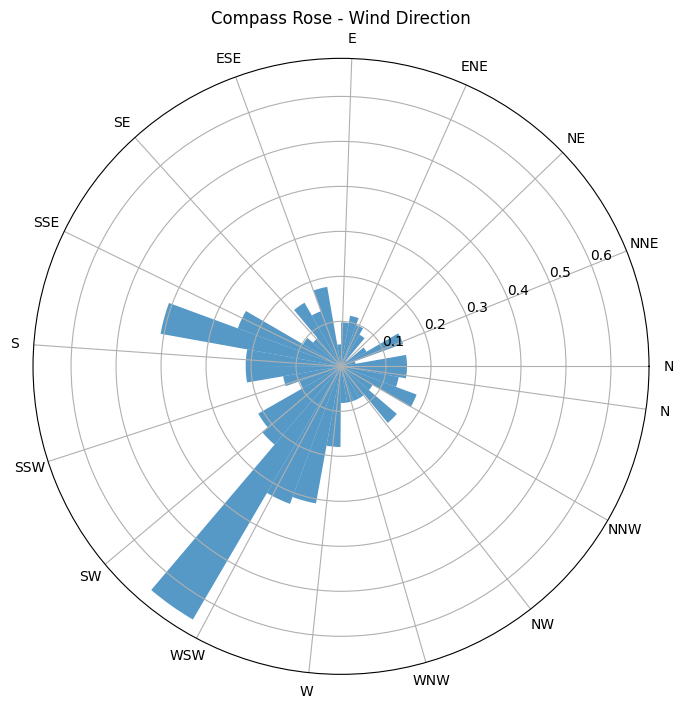

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract the 'wind_direction' column
wind_direction_data = filtered_df['wind_direction']

# Filter out non-null values and convert to numbers
wind_direction_data = wind_direction_data.dropna()
wind_direction_degrees = pd.to_numeric(wind_direction_data, errors='coerce')
wind_direction_degrees = wind_direction_degrees.dropna()

# Convert wind direction to radians
wind_direction_rad = np.radians(wind_direction_degrees)

# Create a wind rose plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Create a histogram of wind direction
n, bins, patches = plt.hist(wind_direction_rad, bins=36, density=True, alpha=0.75)

# Add labels to sectors
direction_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                    'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW', 'N']
ax.set_xticks(np.radians(range(0, 360, 360 // len(direction_labels) + 1)))  # +1 to match the number of labels and sectors
ax.set_xticklabels(direction_labels)

# Add a title
plt.title('Compass Rose - Wind Direction')

# Display the plot
plt.show()


**Observations:**

1. Brightness: When stratified by 'satellite' and 'daynight', differences in brightness distribution can be observed. There is also variability across different hours ('hour').

2. Scan and Track: The boxplots for these variables show that there is less variability in their values ​​compared to other variables.

3. Confidence: There is notable variability in confidence values, which could suggest different levels of certainty in fire detection.

4. FRP (Fire Radiative Power): This boxplot shows a distribution with several outliers, which could indicate high intensity fire events.

5. Temperature and Related Variables: 'Temperature', 'Apparent Temperature' and 'Heat Index' have similar distributions, which is expected.

6. Climate Variables: 'Precipitation', 'Humidity', 'Wind Speed', etc., also show significant variability that could influence the spread of fires.

**Conclusions:**

*   Variables such as 'Brightness' and 'FRP' could be good indicators of fire intensity, as evidenced by the variability of their distributions.
*   'Confidence' could also be an important variable to consider when evaluating fire detection.
*   Climatic and atmospheric variables such as 'Temperature', 'Humidity' and 'Wind Speed' can also play a significant role in the spread of fires.








In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Remove 'Incendio' from the list of selected columns, if it exists
if 'Fire' in selected_columns:
    selected_columns.remove('Fire')

# Filter the dataset to include only the selected columns and make an explicit copy
filtered_data_for_boxplot = df[selected_columns].copy()

# For categorical columns like 'satellite' and 'daynight', convert them to category type for better boxplot visualization
categorical_columns = ['satellite', 'daynight']
filtered_data_for_boxplot[categorical_columns] = filtered_data_for_boxplot[categorical_columns].astype('category')

# Re-define the list of numeric columns based on the filtered dataset
numeric_columns = filtered_data_for_boxplot.select_dtypes(include=[np.number]).columns.tolist()

# Define the categorical columns for boxplot
categorical_columns_for_boxplot = ['satellite', 'daynight', 'hour']  # Add or remove columns as needed

# Create vertical boxplots in a grid for the numeric and selected categorical columns
plt.figure(figsize=(20, 30))
for i, column in enumerate(numeric_columns + categorical_columns_for_boxplot, 1):
    plt.subplot(7, 3, i)  # Adjusted the grid size to fit the additional plots
    if column in categorical_columns_for_boxplot:
        sns.boxplot(x=column, y='brightness', data=filtered_data_for_boxplot)
        plt.title(f'Boxplot of Brightness by {column}')
        if column == 'hour':  # Rotate x-axis labels for better visibility
            plt.xticks(rotation=90)
    else:
        sns.boxplot(y=filtered_data_for_boxplot[column])
        plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()




# **Spatiotemporal Analysis and Visualization of Fire Incidents**

This script focuses on analyzing and filtering a set of fire-related data. In here we resample the data at 6-hour intervals, and calculate aggregate metrics like mean and sum for certain columns. It then creates an auxiliary column to mark the continued presence of fire, identified by at least four consecutive '1s', and filters the DataFrame based on this criteria. Finally, the data set is sorted by the date and time column and duplicate rows are removed, leaving a data set focused on significant and sustained fire events.

In [ ]:
%%time
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV
df = pd.read_csv('Dataset_Nogales_Filtered.csv', parse_dates=['Datetime']).rename({'Fire ': 'Fire'}, axis=1)




Calculate the minimum and maximum latitude and longitude

In [ ]:
from numpy.ma.core import product
# Calculate the minimum and maximum latitude and longitude
latMin = df["latitude"].min()
latMax = df["latitude"].max()
lonMin = df["longitude"].min()
lonMax = df["longitude"].max()

# Define the grid size in degrees
degrees = 0.05

print("Minimum latitude in the data: " + str(latMin))
print("Maximum latitude in the data: " + str(latMax))
print("Minimum longitude in the data: " + str(lonMin))
print("Maximum longitude in the data: " + str(lonMax))

degrees = 0.05  # grid size in degrees, 0.009 is approximately 1 km (1/111.1)
print("Resolution in degrees: " + str(degrees))




Dimensions are calculated based on latitude and longitude

In [ ]:
import math

# Calculate the length of the grid in the y-axis (latitude)
yLen = math.ceil((latMax - latMin) / 0.045 + 1)

# Calculate the length of the grid in the x-axis (longitude)
xLen = math.ceil(abs((lonMin - lonMax) / 0.045 - 1))

(yLen, xLen)


The X and Y grid coordinates are calculated for each data point and stored in new columns in the DataFrame. Columns X and Y have been converted to integers.

In [ ]:
# Calculate the grid coordinates for each data point and store them in new columns 'x' and 'y'
df["y"] = ((latMax - df["latitude"]) / degrees)
df["x"] = ((abs(lonMin - df["longitude"])) / degrees)

# Convert the 'x' and 'y' columns to integers
df = df.astype({'x': 'int', 'y': 'int'})

# Show the first few rows of the dataframe to confirm the new columns
df.head()


DataSet

In [ ]:
df

This code groups the data by both hour and day. This way, we can understand how many records we have in each time interval. vPh gives us the count per hour, and vPd gives us the count per day.

In [ ]:
# Asegúrate de que 'Datetime' es una columna en df
df_reset = df.reset_index()

# Agrupa los registros por hora y día
vPh = df_reset.groupby([pd.Grouper(key='Datetime', freq='H')]).size().reset_index(name='count')




In [ ]:
vPd = df.groupby([pd.Grouper(key='Datetime', freq='D')]).size().reset_index(name='count')



In [ ]:
# Show the first few rows of the dataframe grouped by hour to confirm its structure
vPh.head()

In [ ]:
vPh

In [ ]:
vPd

This code displays the first rows of the valuesPerHour DataFrame, which contains the data grouped by time and X and Y coordinates. This gives us a quick view of what the data looks like after grouping, allowing us to confirm that the structure of the DataFrame is what we expect .

In [ ]:
# Group the records by hour, x, and y coordinates, then count the number of records for each group
valoresPorHora = df.groupby([pd.Grouper(key='Datetime', freq='H'), 'x', 'y']).size().reset_index(name='count')


In [ ]:
# Show the first few rows of the dataframe to confirm its structure
valoresPorHora.head()

This block of code creates a list of arrays, where each array represents data for a specific time from February 24, 2016 to January 6, 2023. Each array has dimensions based on the previously calculated X and Y lengths.

Within each matrix, the cell at position (y,x) shows the number of records at that specific location and for that specific time. For example, if there are 5 fires recorded at a specific location at 3 PM on a given day, then the matrix corresponding to that time will have a '5' in the cell representing that location.

Finally, the code displays the first generated array to verify that everything worked as expected.

In [ ]:
from datetime import datetime, timedelta
import numpy as np

# Initialize start and end times for the loop
start_time = datetime(2016, 2, 24, 21, 0)
end_time = datetime(2023, 9, 19, 4, 0)


# Initialize an empty list to store matrices
matrices = []

# Loop through each hour between start_time and end_time
while start_time < end_time:
    # Filter the DataFrame for records corresponding to the current hour
    temp = valoresPorHora[valoresPorHora["Datetime"] == start_time]

    # Initialize a zeros matrix of dimensions (yLen, xLen)
    a = np.zeros((yLen, xLen))

    # If there are records for the current hour, populate the matrix
    if len(temp) > 0:
        for index, row in temp.iterrows():
            a[row["y"], row["x"]] = row["count"]

    # Append the matrix to the list
    matrices.append(a)

    # Increment start_time by one hour
    start_time += timedelta(hours=1)

# Show the first matrix for verification
matrices[0] if matrices else "No matrices generated"


This code block calculates the total sum of values ​​contained in the matrices generated during the analysis. Each array represents the activity recorded at a specific time within a date range. The code loops through all the arrays, adds the values ​​in each one, and displays the total result.

In [ ]:
# Initialize an empty numpy array to store the values
valores = np.array([])

# Loop through each matrix in the 'matrices' list
for i in range(len(matrices)):
    # Calculate the sum of values in the current matrix and append it to 'valores'
    valores = np.append(valores, matrices[i].sum())

# Calculate the sum of all the values in 'valores'
total_sum = valores.sum()

# Display the total sum
total_sum


This block of code parses a list of values ​​and separates those that are equal to zero from those that are not. The indices of zero values ​​are stored in the zeroVal list, while the indices of non-zero values ​​are stored in the valIndex list. This allows you to identify and manage null or zero values ​​in the data.

In [ ]:
len(valores)

In [ ]:
valores.sum()

In [ ]:
%%time
zeroVal = []
valIndex = []

# Loop through each value in 'valores'
for i in range(len(valores)):
    if valores[i] == 0:
        zeroVal.append(i)
    else:
        valIndex.append(i)


In this segment, the length of two lists is being calculated:

len(zeroVal) returns the number of elements in the zeroVal list. This list contains the indices of the values ​​in the original list that are equal to zero.

len(valIndex) returns the number of elements in the valIndex list. This list contains the indices of the values ​​in the original list that are not equal to zero.


Generate the heatmap with a custom color palette ranging from red to yellow

In [ ]:
# Generate the heatmap with a custom color palette ranging from red to yellow
plt.figure(figsize=(12, 10))
sns.histplot(df, x="longitude", y="latitude", bins=50, cmap="YlOrRd", cbar=True, cbar_kws={'label': 'Frequency of Fires'})
plt.title('Heatmap of Fires Based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# **Geotemporal Analysis and Visualization of Events in a Specific Area Over Time**


Libraries are imported

In [ ]:
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import copy
import os, datetime
from shapely.geometry.polygon import Polygon, Point
from dateutil.rrule import rrule, MONTHLY
from dateutil.parser import parse

import folium
import matplotlib.colors as colors
from branca.element import Figure

A geospatial analysis originally designed for a large data set is adapted. The objective is to filter geographic points within a defined polygon, calculate the most frequent time at which events occur at those points, and visualize the results on monthly maps. The data set has 352 records and contains relevant columns such as 'latitude', 'longitude', and 'Datetime'.

In [ ]:
# Let's start by reading the uploaded CSV file and showing its basic information to understand its structure.
import pandas as pd

# Read the CSV file
df = pd.read_csv('Dataset_Nogales_Filtered.csv', parse_dates=True, infer_datetime_format=True)

# Show the basic information about the DataFrame
df.info()



This code snippet uses NumPy to generate a set of geographic points. Intervals and limits are established for latitude and longitude. Lists of intervals are then created and points are generated by combining these intervals. At the end, the number of intervals and the total number of points generated are printed.

In [ ]:
# Importing numpy for numerical operations
import numpy as np

# Setting the interval and boundaries for latitude and longitude
intervalo = 0.05
latMin = 30.7387
latMax = 31.3099
lonMin = -111.23656
lonMax = -110.6363

# Creating intervals for latitude and longitude
latInterval = np.arange(latMin, latMax, intervalo * 2)
lonInterval = np.arange(abs(lonMax), abs(lonMin), intervalo * 2)

# Generating points based on the latitude and longitude intervals
points = []
for i in latInterval:
    for j in lonInterval:
        point = [-j, i]
        points.append(point)
        print(f"Punto añadido: {point}")


# Print the lengths of the latitude and longitude intervals and the total number of points
len(latInterval), len(lonInterval), len(points)


This code snippet uses the Matplotlib library to create a scatter plot of geographic data points. A new figure is prepared for the graph. Then, the scatter method is used to plot the data points based on their 'longitude' and 'latitude' coordinates from the DataFrame df. The points are colored red and given a size of 10. The graph is labeled with axis names 'Longitude' and 'Latitude' and given a title 'Data Points'. Finally, the graph is displayed with the show() method.

In [ ]:
# Importing matplotlib for plotting
import matplotlib.pyplot as plt



# Plotting the polygon
plt.figure()
plt.scatter(df['longitude'], df['latitude'], c='red', s=10)  # plot the data points from the dataset
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Data Points')
plt.show()


This code snippet extracts the start and end date of the data set to determine the time range of the analysis. Additionally, it sets a 'distance' variable using a previously defined 'interval'. These variables will be used for future analysis and filtering in the notebook.

In [ ]:
# Importing the dateutil parser to convert string to datetime object
from dateutil.parser import parse

# Parsing the 'fecha' column to get the start and end dates
fecha_inicio = parse(df["date"][0])
fecha_fin = parse(df["date"].iloc[-1])  # Using iloc for better readability

# Using the intervalo defined earlier for distancia
distancia = intervalo


In [ ]:
fecha_inicio

In [ ]:
intervalo

In [ ]:
distancia

It performs geotemporal analysis. It iterates through each month in a date range and, for each month, examines a list of geographic points. For each point, the code looks for nearby events in the data set and determines the most frequent time of those events. The results are stored in a list of lists, where each sublist contains the most frequent times for all points in a specific month.

In [ ]:
%%time
from dateutil.rrule import rrule, MONTHLY
import pandas as pd
import numpy as np
from datetime import datetime

# Convert 'fecha' and 'hora' to a single datetime column
df['Datetime'] = pd.to_datetime(df['date'] + ' ' + df['hour'])
print("Columna Datetime creada.")

# Initialize an empty list to store the records
registros = []

# Loop through each month between the start and end date
for fecha in rrule(MONTHLY, dtstart=fecha_inicio, until=fecha_fin):
    print(f"Procesando datos para el mes: {fecha.strftime('%Y-%m')}")

    # Filter the DataFrame to only include records within the current month
    dfTemp = df[(df['Datetime'] >= fecha) & (df['Datetime'] < fecha + pd.DateOffset(months=1))]
    print(f"Registros en el mes: {len(dfTemp)}")
    row = []

    # Loop through each point in the list of points
    for iRow in points:

        # Find records that are close to the current point based on the 'distancia'
        cercanos = dfTemp.loc[np.sqrt((dfTemp['latitude'] - iRow[1])**2 + (dfTemp['longitude'] - iRow[0])**2) < distancia]
        print(f"Punto: {iRow}, Registros cercanos: {len(cercanos)}")

        # Find the most frequent hour if there are any nearby records
        if len(cercanos) != 0:
            horaMax = cercanos['Datetime'].groupby(cercanos['Datetime'].dt.hour).count().idxmax()
            print(f"Hora más frecuente cerca del punto {iRow}: {horaMax}")
        else:
            horaMax = -1
            print(f"No hay registros cercanos al punto {iRow}.")
        row.append(horaMax)

    registros.append(row)
    print(f"Registros procesados para el mes: {fecha.strftime('%Y-%m')}")



It takes a deep copy of the original list of geographic points and stores it in a new list. Then, for each month and each point in this new list, add the most frequent time of nearby events. This top time data is extracted from the 'records' list, which was generated in a previous step. In the end, each point in the copied list will have multiple most frequent times, one for each month analyzed.

In [ ]:
%%time
import copy

# Deep copy the original points list
pointsCopy = copy.deepcopy(points)
print("Copia profunda de la lista de puntos realizada.")

# Loop through each month in the 'registros' list
for mes in range(len(registros)):
    print(f"Procesando mes {mes}...")
    y = 0
    # Loop through each point in the deep-copied list
    for i in pointsCopy:
        # Append the most frequent hour for that point in that month
        i.append(registros[mes][y])
        print(f"Punto {i} actualizado con la hora más frecuente: {registros[mes][y]} en el mes {mes}")
        y += 1
    print(f"Todos los puntos han sido actualizados para el mes {mes}.")


This code snippet prints a summary of key information from the geotemporal analysis. Shows the total number of coordinates analyzed, the number of months included in the study, the start and end dates of the analysis period, and the maximum distance in degrees used for spatial filtering.

In [ ]:
print("Summary of the information:")
print("Coordinates: " + str(len(pointsCopy)))
print("Months: " + str(len(registros)))

print("Start date: " + str(fecha_inicio))
print("End date: " + str(fecha_fin))

print("Maximum distance in degrees: " + str(distancia))



It creates a new directory to store the analysis results. The directory name includes the current date and time to ensure it is unique. If the directory does not exist, the code creates it automatically.


In [ ]:
import os
import datetime

# Create a unique directory path based on the current date and time
path = './Resultados/' + datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

# Create the directory if it doesn't exist
if not os.path.exists(path):
    os.makedirs(path)

path


This code snippet defines two important variables for analysis. The 'radiusMeters' variable sets a radius of 9000 meters to be used in geographic calculations. The 'months' list contains the names of the months in Spanish, which will be used to label results in temporal analyses.


In [ ]:
# Define the radius in meters for geographical calculations
radiusMeters = 9000

# Define a list of month names in English
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]



In here we used the Folium library to create interactive maps. For each month in the data set, it generates a new map showing points of interest represented by circles and markers. Circles are colored according to a color scale that represents the most frequent time of events near each point. The map for each month is saved as an HTML file in a specific directory.

The color scale represents the most frequent time of events near each point of interest for a given month. The code uses a linear color scale that goes from 0 to 23, corresponding to 24 hours a day.

For example, if the color of a circle on the map is green and the color scale indicates that green corresponds to the value 15, that means that for that specific geographic point and month, most nearby events occurred at 15: 00 hours.

The color scale provides a visually effective way to identify temporal patterns in geographic data.

In [ ]:
import folium
from branca.element import Figure
import branca.colormap as cm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



# Create a colormap
colors = cm.LinearColormap([mcolors.rgb2hex(rgba) for rgba in plt.cm.Spectral(np.linspace(0, 1, 24))], vmin=0, vmax=23, max_labels=24)



# Define the points of interest as an array of coordinates
puntos_de_interes = pointsCopy

# Add the points of interest to the map
for mes in range(len(puntos_de_interes[0]) - 2):

    # Initialize a new folium map
    mapa = folium.Map(location=[27.0862, -107.41912], zoom_start=7)

    for punto in puntos_de_interes:
        if punto[mes + 2] != -1:
            # Add a circle for each point of interest
            circle = folium.Circle(
                location=[punto[1], punto[0]],
                radius=radiusMeters,
                color=colors(punto[mes + 2]),
                fill=True,
                fill_color=colors(punto[mes + 2])
            )

            # Add a marker for each point of interest
            folium.Marker(
                location=[punto[1], punto[0]],
                icon=folium.DivIcon(html=f"""<div style="text-align:center; width: 10px; color: black;">{punto[mes+2]}</div>""")
            ).add_to(mapa)

            # Add the circle to the map
            circle.add_to(mapa)

    # Add the colormap to the map
    colors.caption = 'Color Scale'
    mapa.add_child(colors)

    # Save the map
    fig = Figure(width=1000, height=1200)
    fig.add_child(mapa)
    mapa.save(path + "/map_" + str(2015 + (mes // 12)) + "_" + str(months[mes % 12]) + ".html")



It creates a textual summary of key information related to the geotemporal analysis. The summary includes details such as the total number of coordinates analyzed, the time range covered, the maximum distance in degrees used for spatial filtering, and the radius of the circles on the maps. This information is saved in a text string for future reference or to be written to a file.


In [ ]:
r1 = "Summary of the information:\n\n"
r2 = "Coordinates: " + str(len(pointsCopy)) + "\n\n"
r3 = "Months: " + str(len(registros)) + "\n\n"
r4 = "Start date: " + str(fecha_inicio) + "\n\n"
r5 = "End date: " + str(fecha_fin) + "\n\n"
r6 = "Maximum distance in degrees: " + str(distancia) + "\n\n"
r7 = "Radius of each circle: " + str(radiusMeters) + "\n\n"
text = r1 + r2 + r3 + r4 + r5 + r6 + r7

print(text)



# **Generation and Preprocessing of Geotemporal Data for Predictive Models**

Import libraries

In [ ]:
%%time
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
# Read the .CSV
df = pd.read_csv('Dataset_Nogales_Filtered.csv', index_col=0, parse_dates=["Datetime"])

df

**The study area and spatial resolution are established**

Latitude and longitude are used to determine the area of ​​analysis

The spatial resolution determines the size that each side of the pixel will have, in this case the study area will be divided into zones of
 0.00892499999999996 x 0.0.009379062499999868.

With the spatial resolution, the number of zones that the total area has can be calculated, so in this example it would be 64x64.

For this reason the matrices to generate the images must be 64x64




In [ ]:
import math

# Latitude and longitude limits
latF = 31.3099
latI = 30.7387
lonF = -110.6363
lonI = -111.23656

# Calculate the spatial resolution needed to get a 64x64 grid
resEspLat = (latF - latI) / 64
resEspLon = (lonF - lonI) / 64

print("\nNew spatial resolution for latitude:", resEspLat)
print("New spatial resolution for longitude:", resEspLon)

# Set the number of columns and rows directly to 60
cuaPcolumna = 64
cuaPrenglon = 64

print("\nMatrix dimensions:")
print("Number of columns:", cuaPcolumna)
print("Number of rows:", cuaPrenglon)




It focuses on setting initial and final dates based on the 'Datetime' column of a DataFrame, df. It selects the first and last datetime values from this column and then resets the time components (hour, minute, second) to midnight (00:00:00). The initial date, fI, is set to the first datetime value in the 'Datetime' column, and the final date, fF, is set to the last datetime value. Both dates are adjusted so that they represent the beginning of their respective days. This could be useful for aligning the data to a daily time frame.

In [ ]:
# Initial and final date
fI = df['Datetime'].iloc[0].replace(hour=0, minute=0, second=0)
fF = df['Datetime'].iloc[-1].replace(hour=0, minute=0, second=0)


**Generating the matrices**

In this part, a cycle is made between the initial date and the final date, reviewing the data obtained each day, with the data of each day the activity of that day is recorded in the matrix.

In the end, you will obtain a list with matrices that represent the number of days that this data contains.

In [ ]:
%%time
from datetime import timedelta
import numpy as np

matrices = []
fecha = fI
fechaFinal = fF + timedelta(days=1)

while fecha < fechaFinal:
    print(f"Procesando fecha: {fecha}")
    # Filtra los datos para obtener los registros de la fecha actual
    a = df[(df['Datetime'] >= fecha) & (df['Datetime'] < (fecha + timedelta(days=1)))]
    print(f"Registros encontrados para la fecha {fecha}: {len(a)}")

    # Crea una matriz de ceros para la fecha actual
    m = np.zeros((cuaPcolumna, cuaPrenglon))

    # Itera sobre cada registro en los datos filtrados
    for index, item in a.iterrows():
        latitud = item['latitude']  # Utilizando la columna 'latitude'
        longitud = item['longitude']  # Utilizando la columna 'longitude'

        # Calcula las coordenadas 'x' e 'y' en la matriz
        y = int((latitud - latI) / resEspLat)
        x = int((longitud - lonI) / resEspLon)
        print(f"Coordenadas calculadas para latitud {latitud}, longitud {longitud}: y = {y}, x = {x}")

        # Verifica si las coordenadas están dentro de los límites de la matriz
        if 0 <= y < cuaPcolumna and 0 <= x < cuaPrenglon:
            m[y, x] = 1
        else:
            print(f"Omitiendo: índice fuera de límites para y: {y}, x: {x}")

    # Avanza a la siguiente fecha
    fecha = fecha + timedelta(days=1)
    # Añade la matriz a la lista de matrices
    matrices.append(m)
    print(f"Matriz completada para la fecha {fecha - timedelta(days=1)}")



In [ ]:
len(matrices)

**Visualization**

The code snippet iterates through the last 180 matrices in a list called matrices, printing and visualizing each one. For each matrix, it prints the index and the sum of its values, then displays the matrix as a heat map using Matplotlib. The heat map uses the 'Reds' color scheme, with a color bar added for scale and a title indicating the matrix's index. This visualization can be useful for inspecting the matrices' values and understanding their differences or patterns over time.

In [ ]:
# Print all the matrices
for i, matrix in enumerate(matrices[-180:]):
    print(f"Matrix {i+1}, values: {matrix.sum()}")
    plt.imshow(matrix, cmap='Reds', interpolation='nearest', origin='lower', vmin=0, vmax=1, aspect='auto')
    plt.colorbar()
    plt.title(f"Matrix {i+1}")
    plt.show()



**Generation of stories**

With the images, stories of 5 (This can be modified depending on the case) sequential images are generated which will serve in some prediction model since the images have a sequence.


In [ ]:
historial=[]
for i in range(len(matrices)-4):
    historial.append([matrices[i], matrices[i+1],matrices[i+2],matrices[i+3], matrices[i+4]])
np.shape(historial)

**Results of the process**
In this example the following is obtained.

(2761, 5, 64, 64)

(samples, images, lines, columns)

The 2761 represents the sequences that we have, in this case there are 98.

Each sequence is made up of 5 images, normally in articles they are called frames.

Each image is 64x64 in size.

This set of images could already be used in some predictive models

**Saving the results**

In [ ]:
np.save('historial_1D', historial)

# **Construction and Training of a ConvLSTM Model for Prediction of Geotemporal Sequences**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox

**The files with the matrices for training are loaded**

In [ ]:
%%time
dataset = np.load("historial_1D.npy")

**Form of data**

The data set consists of 2761 sequences of 5 64x64 images.*texto en cursiva*

In [ ]:
dataset.shape

In [ ]:
# Add a channel dimension since the images are grayscale.
dataset = np.expand_dims(dataset, axis=-1)
dataset.shape

The data is normalized between 0 and 1 (In this example it is not necessary since the maximum possible value is 1)

80% of the data is used for training and another 20% for validation

In [ ]:
# Split into train and validation sets using indexing to optimize memory.
indexes = np.arange(dataset.shape[0])
np.random.shuffle(indexes)
train_index = indexes[: int(0.8 * dataset.shape[0])]
val_index = indexes[int(0.8 * dataset.shape[0]) :]
train_dataset = dataset[train_index]
val_dataset = dataset[val_index]

# We'll define a helper function to shift the frames, where
# `x` is frames 0 to n - 1, and `y` is frames 1 to n.
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :]
    return x, y


# Apply the processing function to the datasets.
x_train, y_train = create_shifted_frames(train_dataset)
x_val, y_val = create_shifted_frames(val_dataset)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

**Visualization of an example sequence**

In [ ]:
import matplotlib.colors as mcolors

# Find sequences that have at least one matrix with a fire and the size of each fire
indices_with_fires = [(i, max(matrix.sum() for matrix in seq)) for i, seq in enumerate(train_dataset) if any(matrix.sum() > 0 for matrix in seq)]

# If there are no sequences with fires, terminate the script here
if not indices_with_fires:
    print("No sequences with fires.")
else:
    # Sort the sequences by the size of the largest fire in each and select the largest one
    indices_with_fires.sort(key=lambda x: x[1], reverse=True)
    data_choice, _ = indices_with_fires[0]

    # Create a custom colormap: light gray for background and orange for fire
    colors = [(0.8, 0.8, 0.8), (1, 0.5, 0)]  # Light Gray to Orange
    n_bins = 100
    cmap_name = 'custom1'
    custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    # Display the matrices of the selected sequence
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    fig.suptitle('Sequence of a fire')
    for i, ax in enumerate(axes):
        ax.imshow(train_dataset[data_choice][i], cmap=custom_cmap, vmin=0, vmax=1)
    plt.show()




**Model construction**

The construction of a neural network model is designed for spatiotemporal data, likely using TensorFlow's Keras API. The model begins with an input layer that has a flexible frame size, specified as (None, *x_train.shape[2:]), meaning it can handle a batch of 5D tensors with varying time steps. Three ConvLSTM2D layers follow, each equipped with Batch Normalization. These layers are specifically tailored to handle spatiotemporal data, capturing both spatial and temporal patterns. The kernel sizes for these ConvLSTM2D layers are 5x5, 3x3, and 1x1, respectively, and each uses 64 filters. A final Conv3D layer is used to produce spatiotemporal output with a single channel. The model is then compiled using binary cross-entropy as the loss function and Adam as the optimizer.

In [ ]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)

x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)

x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)

x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

**Model Summary**

The output from model.summary() describes a convolutional LSTM neural network designed for spatiotemporal data analysis. The architecture consists of an Input Layer, three ConvLSTM2D layers interspersed with two Batch Normalization layers, and a final Conv3D layer. The model is capable of handling 5D input tensors, specifically formatted as (None, None, 64, 64, 1), and it contains a total of 746,689 parameters, with 2.85 MB as its approximate size. The ConvLSTM2D layers are specialized in capturing both spatial and temporal features, while the Batch Normalization layers help stabilize the learning process.

In [ ]:
print(model.summary())

# **The model is trained**

The code snippet is for training a machine learning model using Keras and then evaluating its performance on a validation set. The script employs early stopping and learning rate reduction as callbacks to improve training efficiency. It specifies training hyperparameters, such as the number of epochs and batch size, and then fits the model to the training data. Post-training, the script predicts labels for the validation data. These predictions are then flattened and thresholded to classify them as either 0 or 1. Finally, the precision and recall metrics are calculated using scikit-learn's functions, offering an evaluation of the model's performance on the validation set.

In [ ]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 20
batch_size = 5

# Fit the model to the training data.
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
)

from sklearn.metrics import precision_score, recall_score

# Generate predictions for the validation set
try:
    y_val_pred = model.predict(x_val)
except Exception as e:
    print(f"Error during prediction: {e}")

# Flatten the labels and predictions to calculate precision and recall
y_val_true = y_val.flatten()
y_val_pred = y_val_pred.flatten()

# Set a threshold to classify predictions as 0 or 1
threshold = 0.5
y_val_pred = (y_val_pred > threshold).astype(int)

# Calculate precision and recall for fire
fire_precision = precision_score(y_val_true, y_val_pred)
fire_recall = recall_score(y_val_true, y_val_pred)

print(f"Fire Precision: {fire_precision}")
print(f"Fire Recall: {fire_recall}")

# Calculate precision and recall for no-fire
# Here, 0 is treated as the positive class
no_fire_precision = precision_score(1 - y_val_true, 1 - y_val_pred)
no_fire_recall = recall_score(1 - y_val_true, 1 - y_val_pred)

print(f"No-Fire Precision: {no_fire_precision}")
print(f"No-Fire Recall: {no_fire_recall}")

 This code snippet evaluates the performance of a trained machine learning model focused on fire prediction. It imports precision_score and recall_score from scikit-learn to calculate Precision and Recall metrics. The model first generates predictions for the validation set and flattens them along with the true labels. A threshold of 0.5 is applied to classify the flattened predictions as either "Fire" (1) or "No Fire" (0). Precision and Recall metrics are then calculated for both "Fire" and "No Fire" scenarios. Any exceptions during prediction are caught and displayed, and the final calculated metrics are printed out. This provides a comprehensive understanding of the model's ability to accurately predict both fire and no-fire conditions.

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Generate predictions for the validation set
try:
    y_val_pred = model.predict(x_val)
except Exception as e:
    print(f"Error during prediction: {e}")

# Flatten the labels and predictions to calculate precision and recall
y_val_true = y_val.flatten()
y_val_pred = y_val_pred.flatten()

# Set a threshold to classify predictions as 0 or 1
threshold = 0.5
y_val_pred = (y_val_pred > threshold).astype(int)

# Calculate precision and recall
precision = precision_score(y_val_true, y_val_pred)
recall = recall_score(y_val_true, y_val_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")


# Calculate precision and recall for no-fire
# Here, 0 is treated as the positive class
no_fire_precision = precision_score(1 - y_val_true, 1 - y_val_pred)
no_fire_recall = recall_score(1 - y_val_true, 1 - y_val_pred)

print(f"No-Fire Precision: {no_fire_precision}")
print(f"No-Fire Recall: {no_fire_recall}")

# **Fire Simulation and Prediction with ConvLSTM Model**

**The model is used to predict the 5 images and is visualized. Here we need to put something to catch a fire**

The code snippet aims to simulate a more realistic sequence of a fire spreading over time on a 64x64 grid. The fire starts at the center of the grid and propagates over five time steps. Specifically, the fire is initialized at the cell (32, 32) on the grid. The fire then spreads to adjacent cells based on certain conditions. The "Propagate the fire" section uses nested loops to iterate through each cell to check if it's on fire (== 1). If it is, the fire spreads to adjacent cells within a 5x5 square centered on that cell. The spread is stochastic, controlled by a random number generator; the fire will spread to an adjacent cell only if a randomly generated number is greater than 0.5. Finally, the script uses Matplotlib to visualize the fire's growth over the five time steps.

In [ ]:
import numpy as np

# Initialize the fire sequence with zeros
fire_sequence_large = np.zeros((5, 64, 64))

# Start the fire in the center in the first frame
fire_sequence_large[0, 32, 32] = 1

# Propagate the fire in the subsequent frames
for t in range(1, 5):
    fire_sequence_large[t] = fire_sequence_large[t-1].copy()
    for i in range(64):
        for j in range(64):
            if fire_sequence_large[t-1, i, j] == 1:
                # Propagate the fire to adjacent cells with some randomness
                for x in range(max(0, i-2), min(64, i+3)):
                    for y in range(max(0, j-2), min(64, j+3)):
                        if np.random.rand() > 0.5:
                            fire_sequence_large[t, x, y] = 1



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a custom color map
colors = [(0.8, 0.8, 0.8), (1, 0.5, 0)]  # Light gray to orange
n_bins = 100  # Number of bins
cmap_name = 'custom1'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Assuming that fire_sequence_large is already defined and contains your fire sequence
# If that's not the case, make sure to define it before running this code

# Create a new figure with a custom grid layout
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# First row for the original frames
for i in range(5):
    axes[i].imshow(fire_sequence_large[i], cmap=custom_cmap, vmin=0, vmax=1)
    axes[i].set_title(f'Original Time {i+1}')

plt.show()









In [ ]:
input_sequence = np.expand_dims(fire_sequence_large, axis=(0, -1))  # Adding batch and channel dimensions
predicted_sequence = model.predict(input_sequence)

# Extract the last frame from the predicted sequence
last_predicted_frame = np.squeeze(predicted_sequence[0, -1, ...])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

# Create a custom color map
colors = [(0.8, 0.8, 0.8), (1, 0.5, 0)]  # Light Gray to Orange
n_bins = 100  # Number of bins
cmap_name = 'custom1'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Create a new figure with custom grid layout
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 5)

# First row for the original frames
axes_original = [plt.subplot(gs[i]) for i in range(5)]
for i, ax in enumerate(axes_original):
    ax.imshow(fire_sequence_large[i], cmap=custom_cmap, vmin=0, vmax=1)
    ax.set_title(f'Original Time {i+1}')

# Second row for the "predicted" frames
axes_predicted = [plt.subplot(gs[i+5]) for i in range(5)]
for i, ax in enumerate(axes_predicted):
    cmap_choice = custom_cmap if i != 4 else 'viridis'
    frame_choice = fire_sequence_large[i] if i != 4 else last_predicted_frame
    title_choice = 'Original Time' if i != 4 else 'Actual Prediction'
    ax.imshow(frame_choice, cmap=cmap_choice, vmin=0, vmax=1)
    ax.set_title(f'{title_choice} {i+1}')

plt.show()




* In the first line is the original sequence of 5 images.
* In the second there are 4 original frames and the 5 represents the prediction that the model predicted.
* The only modification I make to the prediction is to apply a limit to define the value in each area to be 0 or 1 to be able to visualize it in a better way.
* The prediction depends on how the data has been entered, if each matrix in the sequence represents one day of data, then the prediction would be for the next day based on the previous 4 days.










The code is performing an evaluation of the accuracy and sensitivity (recall) of a prediction model for a sequence of fires. To do this, it compares the last original frame with the last frame predicted by the model, for both the "fire" and "no-fire" cases.

In [ ]:
# We use the last original frame and the last predicted frame for the calculation of metrics
last_original_frame = fire_sequence_large[-1]
last_predicted_frame = last_predicted_frame

# Apply a threshold to determine fire or no fire
threshold = 0.5
last_original_frame_binary = np.where(last_original_frame > threshold, 1, 0)
last_predicted_frame_binary = np.where(last_predicted_frame > threshold, 1, 0)

# Count TP, FP, TN, FN for fire
TP = np.sum((last_original_frame_binary == 1) & (last_predicted_frame_binary == 1))
FP = np.sum((last_original_frame_binary == 0) & (last_predicted_frame_binary == 1))
TN = np.sum((last_original_frame_binary == 0) & (last_predicted_frame_binary == 0))
FN = np.sum((last_original_frame_binary == 1) & (last_predicted_frame_binary == 0))

# Calculate fire precision and fire recall
precision = TP / (TP + FP) if TP + FP > 0 else 0
recall = TP / (TP + FN) if TP + FN > 0 else 0

print(f"Fire Precision: {precision}")
print(f"Fire Recall: {recall}")

# Invert the binary labels for no-fire cases
last_original_frame_binary_inverted = 1 - last_original_frame_binary
last_predicted_frame_binary_inverted = 1 - last_predicted_frame_binary

# Count TP, FP, TN, FN for no-fire
TP_no_fire = np.sum((last_original_frame_binary_inverted == 1) & (last_predicted_frame_binary_inverted == 1))
FP_no_fire = np.sum((last_original_frame_binary_inverted == 0) & (last_predicted_frame_binary_inverted == 1))
TN_no_fire = np.sum((last_original_frame_binary_inverted == 0) & (last_predicted_frame_binary_inverted == 0))
FN_no_fire = np.sum((last_original_frame_binary_inverted == 1) & (last_predicted_frame_binary_inverted == 0))

# Calculate no-fire precision and no-fire recall
precision_no_fire = TP_no_fire / (TP_no_fire + FP_no_fire) if TP_no_fire + FP_no_fire > 0 else 0
recall_no_fire = TP_no_fire / (TP_no_fire + FN_no_fire) if TP_no_fire + FN_no_fire > 0 else 0

print(f"No-Fire Precision: {precision_no_fire}")
print(f"No-Fire Recall: {recall_no_fire}")

# **IN HERE WE TAKE RANDOM SEQUENCES FROM THE VALIDATION DATASET AND TEST THEM**

In [ ]:
# Create a custom color map
colors = [(0.8, 0.8, 0.8), (1, 0.5, 0)]  # Light Gray to Orange
n_bins = 100  # Number of bins
cmap_name = 'custom1'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)



# Select a random example from the validation dataset.
example = val_dataset[np.random.choice(range(len(val_dataset)), size=1)[0]]

# Pick the first/last ten frames from the example.
frames = example[:4, ...]
original_frames = example[4:, ...]


# Extract the model's prediction and post-process it.
new_prediction = model.predict(np.expand_dims(frames, axis=0))
new_prediction = np.squeeze(new_prediction, axis=0)
predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

# Extend the set of prediction frames.
frames = np.concatenate((frames, predicted_frame), axis=0)


# Create a new figure with custom grid layout
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 5)

# First row for the original frames
axes_original = [plt.subplot(gs[i]) for i in range(5)]
for i, ax in enumerate(axes_original):
    ax.imshow(np.squeeze(frames[i]), cmap=custom_cmap, vmin=0, vmax=1)
    ax.set_title(f'Original Time {i+1}')

# Second row for the "predicted" frames
axes_predicted = [plt.subplot(gs[i+5]) for i in range(5)]
for i, ax in enumerate(axes_predicted):
    cmap_choice = custom_cmap if i != 4 else 'viridis'
    frame_choice = np.squeeze(frames[i]) if i != 4 else np.squeeze(np.where(frames[-1] > frames[-1].max() * .5, 1, 0))
    title_choice = 'Original Time' if i != 4 else 'Actual Prediction'
    ax.imshow(frame_choice, cmap=cmap_choice, vmin=0, vmax=1)
    ax.set_title(f'{title_choice} {i+1}')

plt.show()






The code is performing an evaluation of the accuracy and sensitivity (recall) of a prediction model for a sequence of fires. To do this, it compares the last original frame with the last frame predicted by the model, for both the "fire" and "no-fire" cases.

In [ ]:
# We use the last original frame and the last predicted frame for the calculation of metrics
last_original_frame = original_frames[-1]
last_predicted_frame = predicted_frame

# Apply a threshold to determine fire or no fire
threshold = 0.5
last_original_frame_binary = np.where(last_original_frame > threshold, 1, 0)
last_predicted_frame_binary = np.where(last_predicted_frame > threshold, 1, 0)

# Count TP, FP, TN, FN for fire
TP = np.sum((last_original_frame_binary == 1) & (last_predicted_frame_binary == 1))
FP = np.sum((last_original_frame_binary == 0) & (last_predicted_frame_binary == 1))
TN = np.sum((last_original_frame_binary == 0) & (last_predicted_frame_binary == 0))
FN = np.sum((last_original_frame_binary == 1) & (last_predicted_frame_binary == 0))

# Calculate fire precision and fire recall
precision = TP / (TP + FP) if TP + FP > 0 else 0
recall = TP / (TP + FN) if TP + FN > 0 else 0

print(f"Fire Precision: {precision}")
print(f"Fire Recall: {recall}")

# Invert the binary labels for no-fire cases
last_original_frame_binary_inverted = 1 - last_original_frame_binary
last_predicted_frame_binary_inverted = 1 - last_predicted_frame_binary

# Count TP, FP, TN, FN for no-fire
TP_no_fire = np.sum((last_original_frame_binary_inverted == 1) & (last_predicted_frame_binary_inverted == 1))
FP_no_fire = np.sum((last_original_frame_binary_inverted == 0) & (last_predicted_frame_binary_inverted == 1))
TN_no_fire = np.sum((last_original_frame_binary_inverted == 0) & (last_predicted_frame_binary_inverted == 0))
FN_no_fire = np.sum((last_original_frame_binary_inverted == 1) & (last_predicted_frame_binary_inverted == 0))

# Calculate no-fire precision and no-fire recall
precision_no_fire = TP_no_fire / (TP_no_fire + FP_no_fire) if TP_no_fire + FP_no_fire > 0 else 0
recall_no_fire = TP_no_fire / (TP_no_fire + FN_no_fire) if TP_no_fire + FN_no_fire > 0 else 0

print(f"No-Fire Precision: {precision_no_fire}")
print(f"No-Fire Recall: {recall_no_fire}")


# **IN HERE WE MAKE TESTS WITH THE SEQUENCE THAT HAS THE MOST WILDFIRES FROM THE VALIDATION DATASET**

In [ ]:
# Initialize variables to keep track of the maximum sum and corresponding sequence index
max_sum = 0
max_idx = -1

# Iterate through each sequence in val_dataset
for i, sequence in enumerate(val_dataset):
    # Initialize a variable to keep track of the sum for this sequence
    sequence_sum = 0

    # Iterate through each frame in the sequence
    for frame in sequence:
        # Sum all the values in the frame and add it to the sequence sum
        sequence_sum += frame.sum()

    # Update max_sum and max_idx if this sequence has a higher sum than the current maximum
    if sequence_sum > max_sum:
        max_sum = sequence_sum
        max_idx = i

# max_idx now contains the index of the sequence with the most "incidents" (highest sum)
print(f"The sequence at index {max_idx} has the most incidents with a total sum of {max_sum}.")


**This sequence is the one that has the most fires in the validation dataset**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define your custom colormap here if you haven't already
colors = [(0.8, 0.8, 0.8), (1, 0.5, 0)]  # Light Gray to Orange
n_bins = 100  # Number of bins
cmap_name = 'custom1'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Extract the sequence with the most fires
selected_sequence = val_dataset[max_idx]

# Create a figure and axes for visualization
fig, axs = plt.subplots(1, selected_sequence.shape[0], figsize=(20, 5))

# Iterate through each frame in the sequence and visualize it
for i, frame in enumerate(selected_sequence):
    axs[i].imshow(np.squeeze(frame), cmap=custom_cmap, vmin=0, vmax=1)  # Use your custom colormap here
    axs[i].set_title(f"Frame {i + 1}")

plt.show()


In [ ]:
# Define your custom colormap here if you haven't already
colors = [(0.8, 0.8, 0.8), (1, 0.5, 0)]  # Light Gray to Orange
n_bins = 100  # Number of bins
cmap_name = 'custom1'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Extract the sequence with the most fires
selected_sequence = val_dataset[max_idx]

# Take the first 4 frames for the original sequence
frames = selected_sequence[:4, ...]

# Use the fifth frame from the original dataset
fifth_frame = selected_sequence[4, ...]

# Combine the first 4 frames with the fifth frame
frames = np.concatenate((frames, np.expand_dims(fifth_frame, axis=0)), axis=0)

# Assuming you have a model to predict the next frame
new_prediction = model.predict(np.expand_dims(frames, axis=0))
new_prediction = np.squeeze(new_prediction, axis=0)
predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

# Extend the set of prediction frames
frames = np.concatenate((frames, predicted_frame), axis=0)

# Create a new figure with custom grid layout
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 5)

# First row for the original frames
axes_original = [plt.subplot(gs[i]) for i in range(5)]
for i, ax in enumerate(axes_original):
    ax.imshow(np.squeeze(frames[i]), cmap=custom_cmap, vmin=0, vmax=1)
    ax.set_title(f'Original Time {i+1}')

# Second row for the "predicted" frames
axes_predicted = [plt.subplot(gs[i+5]) for i in range(5)]
for i, ax in enumerate(axes_predicted):
    cmap_choice = custom_cmap if i != 4 else 'viridis'
    frame_choice = np.squeeze(frames[i]) if i != 4 else np.squeeze(np.where(frames[-1] > frames[-1].max() * .5, 1, 0))
    title_choice = 'Original Time' if i != 4 else 'Actual Prediction'
    ax.imshow(frame_choice, cmap=cmap_choice, vmin=0, vmax=1)
    ax.set_title(f'{title_choice} {i+1}')

plt.show()



The code is performing an evaluation of the accuracy and sensitivity (recall) of a prediction model for a sequence of fires. To do this, it compares the last original frame with the last frame predicted by the model, for both the "fire" and "no-fire" cases.

In [ ]:
# We use the fifth original frame from selected_sequence and the last predicted frame for the calculation of metrics
last_original_frame = selected_sequence[4]  # This is the fifth frame
last_predicted_frame = predicted_frame  # This comes from your model's prediction

# Apply a threshold to determine fire or no fire
threshold = 0.5
last_original_frame_binary = np.where(last_original_frame > threshold, 1, 0)
last_predicted_frame_binary = np.where(last_predicted_frame > threshold, 1, 0)

# Count TP, FP, TN, FN for fire
TP = np.sum((last_original_frame_binary == 1) & (last_predicted_frame_binary == 1))
FP = np.sum((last_original_frame_binary == 0) & (last_predicted_frame_binary == 1))
TN = np.sum((last_original_frame_binary == 0) & (last_predicted_frame_binary == 0))
FN = np.sum((last_original_frame_binary == 1) & (last_predicted_frame_binary == 0))

# Calculate fire precision and fire recall
precision = TP / (TP + FP) if TP + FP > 0 else 0
recall = TP / (TP + FN) if TP + FN > 0 else 0

print(f"Fire Precision: {precision}")
print(f"Fire Recall: {recall}")

# Invert the binary labels for no-fire cases
last_original_frame_binary_inverted = 1 - last_original_frame_binary
last_predicted_frame_binary_inverted = 1 - last_predicted_frame_binary

# Count TP, FP, TN, FN for no-fire
TP_no_fire = np.sum((last_original_frame_binary_inverted == 1) & (last_predicted_frame_binary_inverted == 1))
FP_no_fire = np.sum((last_original_frame_binary_inverted == 0) & (last_predicted_frame_binary_inverted == 1))
TN_no_fire = np.sum((last_original_frame_binary_inverted == 0) & (last_predicted_frame_binary_inverted == 0))
FN_no_fire = np.sum((last_original_frame_binary_inverted == 1) & (last_predicted_frame_binary_inverted == 0))

# Calculate no-fire precision and no-fire recall
precision_no_fire = TP_no_fire / (TP_no_fire + FP_no_fire) if TP_no_fire + FP_no_fire > 0 else 0
recall_no_fire = TP_no_fire / (TP_no_fire + FN_no_fire) if TP_no_fire + FN_no_fire > 0 else 0

print(f"No-Fire Precision: {precision_no_fire}")
print(f"No-Fire Recall: {recall_no_fire}")


# **NOW IN HERE WE TAKE A SEQUENCE WITH THE MOST FIRES FROM THE NOGALES_FILTERED_DATASET**

In [ ]:
# To find the sequence of 5 consecutive matrices with the most fires, we can sum the values in each matrix
# and then find the sequence of 5 with the highest total sum of fires.

# Initialize variables to keep track of the max sum and index
max_sum = 0
max_idx = 0

# Loop through the list of matrices to find the sequence of 5 with the most fires
for i in range(len(matrices) - 4):
    current_sum = sum(np.sum(mat) for mat in matrices[i:i + 5])

    if current_sum > max_sum:
        max_sum = current_sum
        max_idx = i

# Extract the sequence with the most fires
sequence_with_most_fires = matrices[max_idx:max_idx + 5]

# Visualize the sequence of 5 matrices with the most fires
for i, matrix in enumerate(sequence_with_most_fires):
    print(f"Matrix {i+1}, values: {matrix.sum()}")
    plt.imshow(matrix, cmap='Reds', interpolation='nearest', origin='lower', vmin=0, vmax=1, aspect='auto')
    plt.colorbar()
    plt.title(f"Matrix {i+1}")
    plt.show()


In [ ]:
# To find out the datetime for these matrices, we can use the index where this sequence starts.
# We know that each matrix corresponds to a specific date starting from 'fI' (the initial date),
# so we can find the date range for this sequence.

# Calculate the datetime range for the sequence with the most fires
start_date_for_sequence = fI + timedelta(days=max_idx)
end_date_for_sequence = start_date_for_sequence + timedelta(days=4)  # As there are 5 matrices, we add 4 days to the start date

print("The sequence of the 5 matrices with the most fires in all the dataset corresponds to the date range from:", start_date_for_sequence, "to", end_date_for_sequence)



In [ ]:
# Define custom colormap again
colors = [(0.8, 0.8, 0.8), (1, 0.5, 0)]  # Light Gray to Orange
n_bins = 100  # Number of bins
cmap_name = 'custom1'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Extract the sequence with the most fires (in this case, it's 'sequence_with_most_fires' from our previous analysis)
selected_sequence = sequence_with_most_fires

# Create a figure and axes for the visualization
fig, axs = plt.subplots(1, len(selected_sequence), figsize=(20, 5))

# Iterate through each frame in the sequence and visualize it
for i, frame in enumerate(selected_sequence):
    axs[i].imshow(np.squeeze(frame), cmap=custom_cmap, vmin=0, vmax=1)  # Use your custom colormap here
    axs[i].set_title(f"Frame {i + 1}")

plt.show()


In [ ]:
input_sequence = np.expand_dims(selected_sequence, axis=(0, -1))  # Adding batch and channel dimensions
predicted_sequence = model.predict(input_sequence)

# Extract the last frame from the predicted sequence
last_predicted_frame = np.squeeze(predicted_sequence[0, -1, ...])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

# Create a custom color map
colors = [(0.8, 0.8, 0.8), (1, 0.5, 0)]  # Light Gray to Orange
n_bins = 100  # Number of bins
cmap_name = 'custom1'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Your code to define fire_sequence_large and last_predicted_frame goes here

# Create a new figure with custom grid layout
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 5)

# First row for the original frames
axes_original = [plt.subplot(gs[i]) for i in range(5)]
for i, ax in enumerate(axes_original):
    ax.imshow(selected_sequence[i], cmap=custom_cmap, vmin=0, vmax=1)
    ax.set_title(f'Original Time {i+1}')

# Second row for the "predicted" frames
axes_predicted = [plt.subplot(gs[i+5]) for i in range(5)]
for i, ax in enumerate(axes_predicted):
    cmap_choice = custom_cmap if i != 4 else 'viridis'
    frame_choice = selected_sequence[i] if i != 4 else last_predicted_frame
    title_choice = 'Original Time' if i != 4 else 'Actual Prediction'
    ax.imshow(frame_choice, cmap=cmap_choice, vmin=0, vmax=1)
    ax.set_title(f'{title_choice} {i+1}')

plt.show()



The code is performing an evaluation of the accuracy and sensitivity (recall) of a prediction model for a sequence of fires. To do this, it compares the last original frame with the last frame predicted by the model, for both the "fire" and "no-fire" cases.

In [ ]:
# We use the fifth original frame from selected_sequence and the last predicted frame for the calculation of metrics
last_original_frame = selected_sequence[-1]  # This is the fifth frame
last_predicted_frame = last_predicted_frame  # This comes from your model's prediction

# Apply a threshold to determine fire or no fire
threshold = 0.5
last_original_frame_binary = np.where(last_original_frame > threshold, 1, 0)
last_predicted_frame_binary = np.where(last_predicted_frame > threshold, 1, 0)

# Count TP, FP, TN, FN for fire
TP = np.sum((last_original_frame_binary == 1) & (last_predicted_frame_binary == 1))
FP = np.sum((last_original_frame_binary == 0) & (last_predicted_frame_binary == 1))
TN = np.sum((last_original_frame_binary == 0) & (last_predicted_frame_binary == 0))
FN = np.sum((last_original_frame_binary == 1) & (last_predicted_frame_binary == 0))

# Calculate fire precision and fire recall
precision = TP / (TP + FP) if TP + FP > 0 else 0
recall = TP / (TP + FN) if TP + FN > 0 else 0

print(f"Fire Precision: {precision}")
print(f"Fire Recall: {recall}")

# Invert the binary labels for no-fire cases
last_original_frame_binary_inverted = 1 - last_original_frame_binary
last_predicted_frame_binary_inverted = 1 - last_predicted_frame_binary

# Count TP, FP, TN, FN for no-fire
TP_no_fire = np.sum((last_original_frame_binary_inverted == 1) & (last_predicted_frame_binary_inverted == 1))
FP_no_fire = np.sum((last_original_frame_binary_inverted == 0) & (last_predicted_frame_binary_inverted == 1))
TN_no_fire = np.sum((last_original_frame_binary_inverted == 0) & (last_predicted_frame_binary_inverted == 0))
FN_no_fire = np.sum((last_original_frame_binary_inverted == 1) & (last_predicted_frame_binary_inverted == 0))

# Calculate no-fire precision and no-fire recall
precision_no_fire = TP_no_fire / (TP_no_fire + FP_no_fire) if TP_no_fire + FP_no_fire > 0 else 0
recall_no_fire = TP_no_fire / (TP_no_fire + FN_no_fire) if TP_no_fire + FN_no_fire > 0 else 0

print(f"No-Fire Precision: {precision_no_fire}")
print(f"No-Fire Recall: {recall_no_fire}")
